In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
fuel_econ = pd.read_csv('fuel-econ.csv')

In [3]:
#creating an ordered categorical data type from the VClass variable
sedan_classes = ['Minicompact Cars','Subcompact Cars','Compact Cars','Midsize Cars','Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = sedan_classes)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses)

In [4]:
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x: x.split()[0])

In [5]:
np.random.seed(2018)
sample = np.random.choice(fuel_econ.shape[0],200, replace = False)
fuel_econ_subset = fuel_econ.loc[sample]

For categorical encodings of color, we can use FacetGrid and set the hue argument to the desired variable

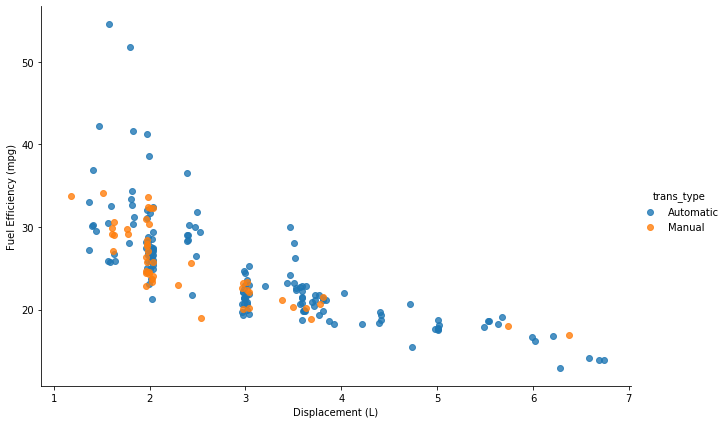

In [12]:
g = sns.FacetGrid(data = fuel_econ_subset,
                  hue = 'trans_type',
                 hue_order=['Automatic','Manual'],
                 height = 6,
                 aspect = 1.5)


g.map(sns.regplot,'displ', 'comb', x_jitter= 0.04,fit_reg = False)
g.add_legend()
plt.xlabel('Displacement (L)')
plt.ylabel('Fuel Efficiency (mpg)');

Now we'll plot color by vehicle class, but change the color palette 

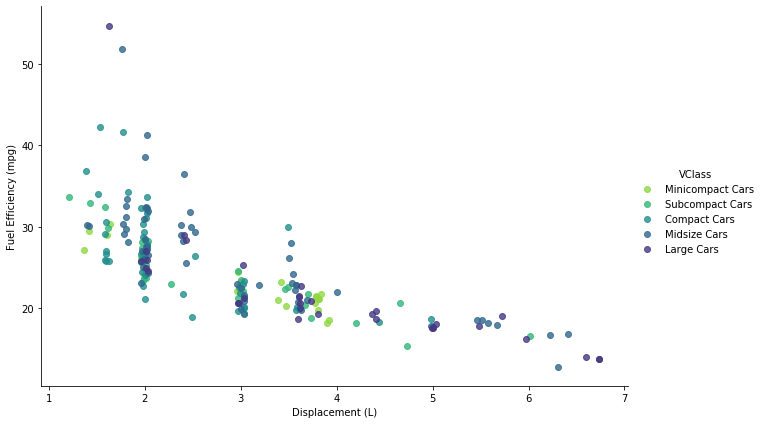

In [17]:
g = sns.FacetGrid(data = fuel_econ_subset,
                  hue = 'VClass',
                 height = 6,
                 aspect = 1.5,
                 palette = 'viridis_r')


g.map(sns.regplot,'displ', 'comb', x_jitter= 0.04,fit_reg = False)
g.add_legend()
plt.xlabel('Displacement (L)')
plt.ylabel('Fuel Efficiency (mpg)');

If we have a numeric variable and use hue, it won't work as it expects a categorical variable. instead we should use plt.scatter

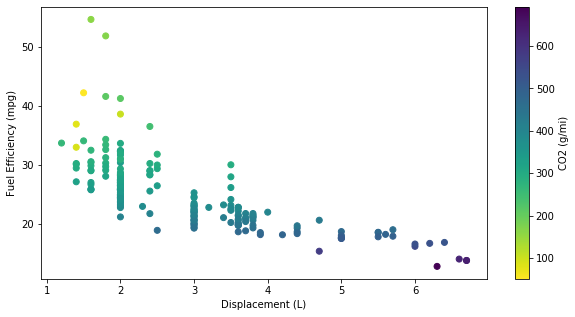

In [26]:
plt.figure(figsize = (10,5))
plt.scatter(data = fuel_econ_subset, x = 'displ',y = 'comb', c = 'co2',
           cmap = 'viridis_r');
plt.colorbar(label = 'CO2 (g/mi)')
plt.xlabel('Displacement (L)')
plt.ylabel('Fuel Efficiency (mpg)');